# 01 — EDA (Exploratory Data Analysis)

Este notebook explora o dataset Bike Sharing (diário).

## Importação de Bibliotecas

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine


## Carregamento do Dataset

In [83]:
# Tente usar o dataset oficial; se não houver, use o sintético
try:
    df = pd.read_csv('../data/raw/day.csv')
    source = 'data/raw/day.csv'
except FileNotFoundError:
    df = pd.read_csv('../data/sample/day_sample.csv')
    source = 'data/sample/day_sample.csv'

print('Usando dados de:', source)
df.head()


Usando dados de: data/sample/day_sample.csv


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,4,0,1,1,5,0,1,0.144406,0.150784,0.627904,0.250526,113,333,446
1,2011-01-02,4,0,1,0,6,0,1,0.173742,0.121491,0.695037,0.240822,95,298,393
2,2011-01-03,4,0,1,0,0,1,1,0.164833,0.122040,0.537053,0.229886,170,628,798
3,2011-01-04,4,0,1,0,1,1,1,0.219712,0.207707,0.694744,0.214552,196,395,591
4,2011-01-05,4,0,1,0,2,1,1,0.173318,0.173207,0.577055,0.219467,177,322,499


## Informações e Estatísticas Iniciais

In [85]:
df.info()       # Estrutura do dataset
df.describe()   # Estatísticas descritivas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      120 non-null    object 
 1   season      120 non-null    int64  
 2   yr          120 non-null    int64  
 3   mnth        120 non-null    int64  
 4   holiday     120 non-null    int64  
 5   weekday     120 non-null    int64  
 6   workingday  120 non-null    int64  
 7   weathersit  120 non-null    int64  
 8   temp        120 non-null    float64
 9   atemp       120 non-null    float64
 10  hum         120 non-null    float64
 11  windspeed   120 non-null    float64
 12  casual      120 non-null    int64  
 13  registered  120 non-null    int64  
 14  cnt         120 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 14.2+ KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,120.00000,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.47500,0.0,2.500000,0.008333,3.016667,0.708333,1.300000,0.251216,0.249161,0.620088,0.209652,235.300000,457.975000,693.275000
std,1.50608,0.0,1.130182,0.091287,2.008316,0.456435,0.543873,0.076335,0.078666,0.086311,0.050842,85.268888,114.251121,160.633722
min,1.00000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.077387,0.059361,0.400504,0.062952,84.000000,212.000000,357.000000
25%,1.00000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.185553,0.191632,0.567744,0.179941,176.250000,366.000000,585.250000
50%,1.00000,0.0,3.000000,0.000000,3.000000,1.000000,1.000000,0.257222,0.254957,0.628036,0.208379,219.000000,458.000000,684.500000
75%,4.00000,0.0,3.250000,0.000000,5.000000,1.000000,2.000000,0.308196,0.304513,0.678685,0.243637,273.750000,540.750000,808.500000
max,4.00000,0.0,4.000000,1.000000,6.000000,1.000000,3.000000,0.428496,0.425087,0.834800,0.368615,517.000000,762.000000,1094.000000


## Pré-processamento 

In [89]:
# Converter coluna 'dteday' para datetime e ordenar por data
df['dteday'] = pd.to_datetime(df['dteday'])
df.sort_values('dteday', inplace=True)

# Criar colunas auxiliares
df['season_name'] = df['season'].map({1:'Primavera', 2:'Verao', 3:'Outono', 4:'Inverno'})
df['year'] = df['yr'] + 2011
df['month'] = df['mnth']
df['day'] = df['dteday'].dt.day


## Visualizações Básicas 


### Distribuição dos Aluguéis

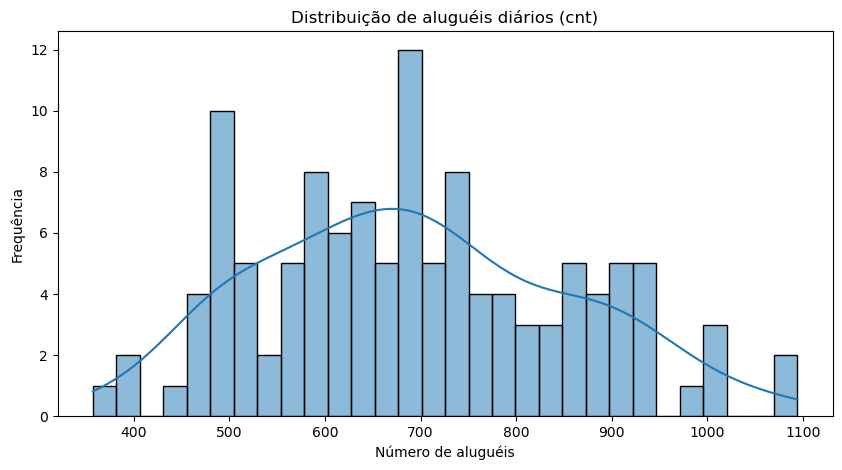

In [96]:
plt.figure(figsize=(10,5))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribuição de aluguéis diários (cnt)")
plt.xlabel("Número de aluguéis")
plt.ylabel("Frequência")
plt.show()


### Distribuição por Estação

C:\Users\geise\AppData\Local\Temp\ipykernel_11440\3574041275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season_name', y='cnt', data=df, palette="Set2")


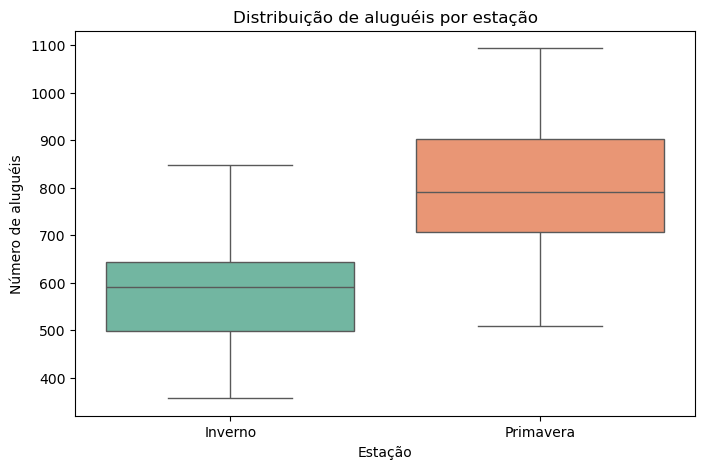

In [99]:
plt.figure(figsize=(8,5))
sns.boxplot(x='season_name', y='cnt', data=df, palette="Set2")
plt.title("Distribuição de aluguéis por estação")
plt.xlabel("Estação")
plt.ylabel("Número de aluguéis")
plt.show()


### Correlação entre Variáveis Numéricas

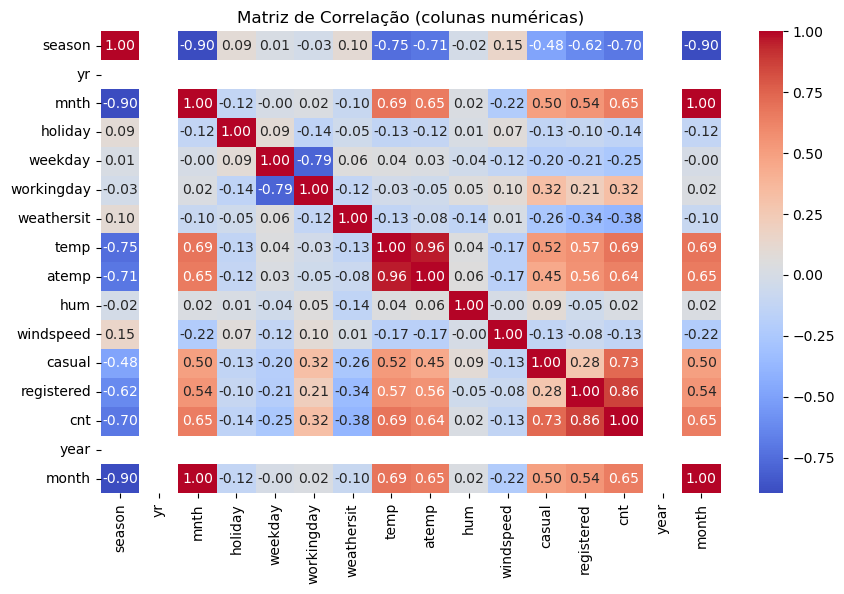

In [102]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação (colunas numéricas)")
plt.show()


## Configuração SQL

In [105]:
# Criar engine SQLite em memória e salvar DataFrame como tabela SQL
engine = create_engine("sqlite://", echo=False)
df.to_sql("bike", con=engine, index=False, if_exists="replace")


120

## Consultas SQL e Visualizações

### Média de aluguéis por estação

,season_name,media_alugueis
0,Inverno,579.898305
1,Primavera,802.934426


C:\Users\geise\AppData\Local\Temp\ipykernel_11440\2059511979.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='media_alugueis', data=sql_result1, palette='viridis')


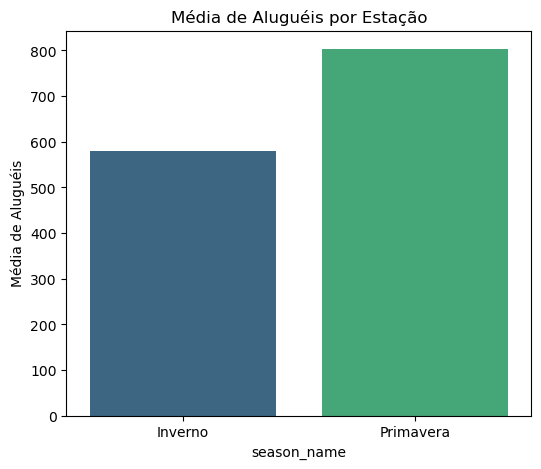

In [109]:
query1 = """
SELECT season_name, AVG(cnt) as media_alugueis
FROM bike
GROUP BY season_name
"""
sql_result1 = pd.read_sql(query1, con=engine)
display(sql_result1)

plt.figure(figsize=(6,5))
sns.barplot(x='season_name', y='media_alugueis', data=sql_result1, palette='viridis')
plt.ylabel('Média de Aluguéis')
plt.title('Média de Aluguéis por Estação')
plt.show()


### Top 10 dias com maior número de aluguéis

,dteday,cnt
0,2011-03-23 00:00:00.000000,1094
1,2011-04-21 00:00:00.000000,1076
2,2011-04-13 00:00:00.000000,1014
3,2011-03-15 00:00:00.000000,1000
4,2011-03-25 00:00:00.000000,998
5,2011-03-30 00:00:00.000000,984
6,2011-03-08 00:00:00.000000,946
7,2011-04-28 00:00:00.000000,938
8,2011-04-29 00:00:00.000000,931
9,2011-04-20 00:00:00.000000,928


C:\Users\geise\AppData\Local\Temp\ipykernel_11440\649942306.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dteday', y='cnt', data=sql_result2, palette='magma')


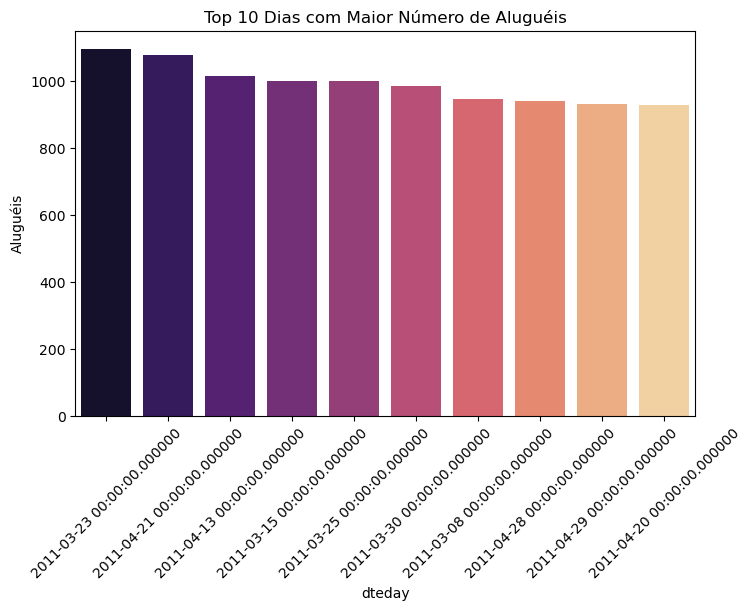

In [112]:
query2 = """
SELECT dteday, cnt
FROM bike
ORDER BY cnt DESC
LIMIT 10
"""
sql_result2 = pd.read_sql(query2, con=engine)
display(sql_result2)

plt.figure(figsize=(8,5))
sns.barplot(x='dteday', y='cnt', data=sql_result2, palette='magma')
plt.xticks(rotation=45)
plt.ylabel('Aluguéis')
plt.title('Top 10 Dias com Maior Número de Aluguéis')
plt.show()


### Comparação de usuários casuais vs registrados

,media_casual,media_registered
0,235.3,457.975


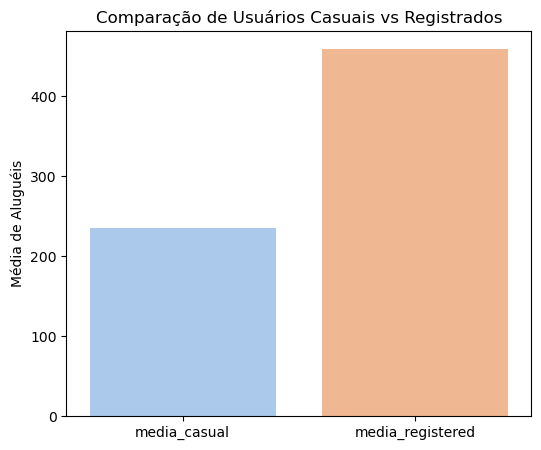

In [115]:
query3 = """
SELECT AVG(casual) as media_casual, AVG(registered) as media_registered
FROM bike
"""
sql_users = pd.read_sql(query3, con=engine)
display(sql_users)

plt.figure(figsize=(6,5))
sns.barplot(data=sql_users, palette='pastel')
plt.ylabel('Média de Aluguéis')
plt.title('Comparação de Usuários Casuais vs Registrados')
plt.show()


### Média de aluguéis por dia da semana

,weekday,media_alugueis
0,0,704.529412
1,1,736.764706
2,2,738.176471
3,3,731.588235
4,4,719.705882
5,5,633.333333
6,6,592.352941


C:\Users\geise\AppData\Local\Temp\ipykernel_11440\2290963286.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='media_alugueis', data=sql_result4, palette='coolwarm')


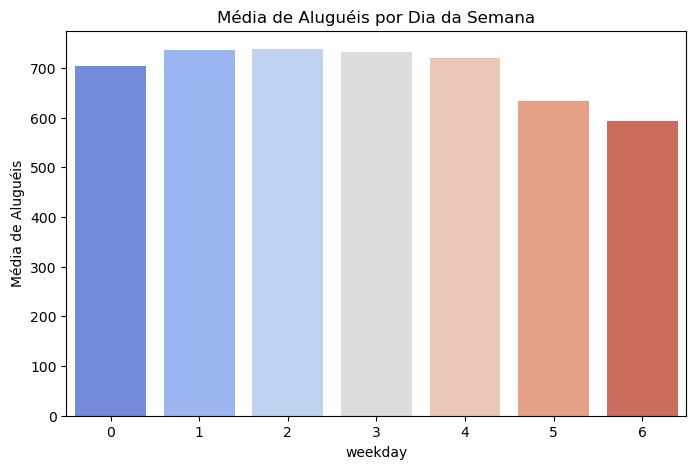

In [118]:
query4 = """
SELECT weekday, AVG(cnt) as media_alugueis
FROM bike
GROUP BY weekday
"""
sql_result4 = pd.read_sql(query4, con=engine)
display(sql_result4)

plt.figure(figsize=(8,5))
sns.barplot(x='weekday', y='media_alugueis', data=sql_result4, palette='coolwarm')
plt.ylabel('Média de Aluguéis')
plt.title('Média de Aluguéis por Dia da Semana')
plt.show()


### Aluguéis ao longo do tempo

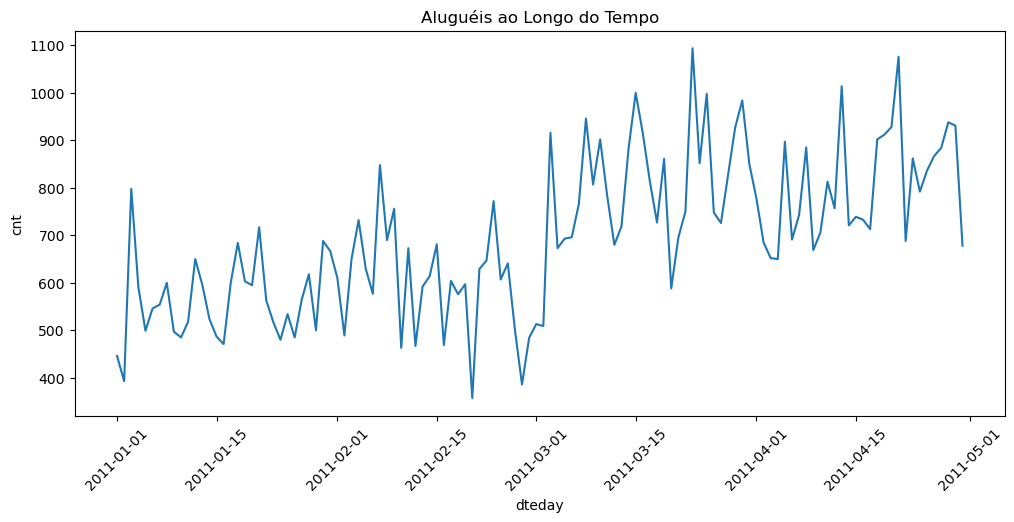

In [121]:
plt.figure(figsize=(12,5))
sns.lineplot(x='dteday', y='cnt', data=df)
plt.xticks(rotation=45)
plt.title('Aluguéis ao Longo do Tempo')
plt.show()


# Análise de Aluguéis de Bicicletas

Este notebook realiza uma análise exploratória dos dados de aluguéis diários de bicicletas. Vamos explorar:
- Aluguéis por estação do ano
- Top dias com maior número de aluguéis
- Comparação entre usuários casuais e registrados
- Correlação entre variáveis climáticas e aluguéis


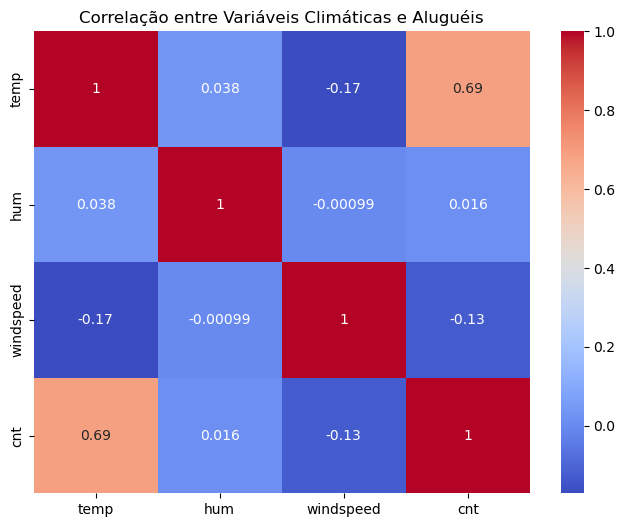

In [124]:
# Mapa de correlação
plt.figure(figsize=(8,6))
sns.heatmap(df[['temp','hum','windspeed','cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Climáticas e Aluguéis')
plt.show()


C:\Users\geise\AppData\Local\Temp\ipykernel_11440\3792730402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='cnt', data=df, palette='Set3')


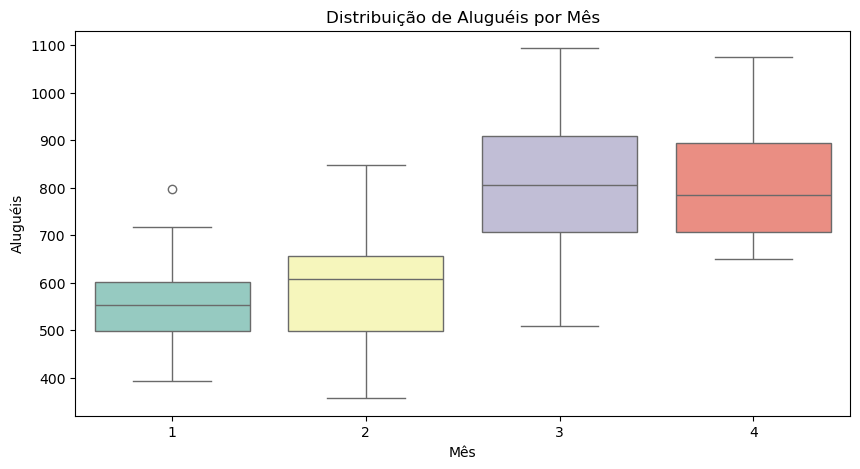

In [127]:
plt.figure(figsize=(10,5))
sns.boxplot(x='month', y='cnt', data=df, palette='Set3')
plt.title('Distribuição de Aluguéis por Mês')
plt.xlabel('Mês')
plt.ylabel('Aluguéis')
plt.show()


C:\Users\geise\AppData\Local\Temp\ipykernel_11440\4259242484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday_name', y='cnt', data=df.groupby('weekday_name')['cnt'].mean().reset_index(), palette='pastel')


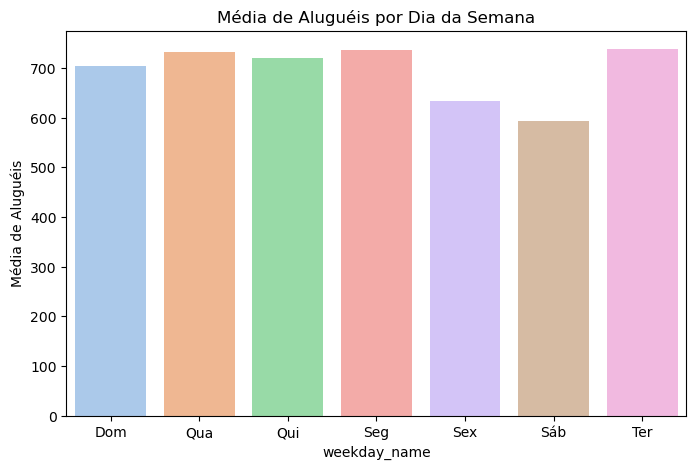

In [129]:
df['weekday_name'] = df['weekday'].map({0:'Dom',1:'Seg',2:'Ter',3:'Qua',4:'Qui',5:'Sex',6:'Sáb'})
plt.figure(figsize=(8,5))
sns.barplot(x='weekday_name', y='cnt', data=df.groupby('weekday_name')['cnt'].mean().reset_index(), palette='pastel')
plt.title('Média de Aluguéis por Dia da Semana')
plt.ylabel('Média de Aluguéis')
plt.show()
